<a href="https://colab.research.google.com/github/npr99/PlanningMethods/blob/master/CensusAPI_PopulationDistributionMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Population Distribution Workflow using Census API in Jupyter Notebook: Dynamic Map of Census Tracts in Boone County, KY, 2000**

**Project Scope and Directive**

This notebook will replicate Figure 3.2 from Wang and Vom Hofe (2007, p.60). 

Figure 3.2 shows the population distribution of 2000 Decennial Census data for Census Tracts located in Boone County, KY.

![Figure 3.2](https://i.imgur.com/PMkI3hT.png)



Figure 3.2 is a mapped spatial distribution of population densities (in persons/sq-km) for all Census Tracts in Boone County (see Wang and Vom Hofe, 2007, p.60). A spatial distribution of population presents the spatial pattern of human settlements which are not evenly distributed (Wang and Vom Hofe, 2007, p.59). In the example, a large portion of the population lives in the eastern portion of the county. Population densities at the Census Tract level allow for a more granular analysis of the population distribution which can vary more dramatically when comparing urban and rural Census Tracts.

Wang, X. and vom Hofe, R. (2007). Research Methods in Urban and Regional Planning, Springer. doi.org/10.1007/978-3-540-49658-8

## Overview of Workflow
This notebook captures the workflow required to calculate and map population density for Census Tracts in a County. The workflow first obtains population size data from US Census data using Census API, downloads TIGER Shapefiles, cleans and joins the population data with the geospatial data. With the two datasets joined population density is calculated and then mapped.

## Overview of notebook
This notebook has four sections. Section 1 provides details on the background for how to navigate Google Colab, API, python packages, and important defintions. Section 1 does not contain any python code, just background information. Section 2 runs the prelimary operations to obtain population and geospatial data. Section 3 cleans the data for joining and calculating population density. The final section explores the data by creating a dynamic map with zoom and pan features.




# 1 - Background Information

This section provides background details designed to be helpful to someone new to Google Colab and Python.

### 1.1 - **Navigating Google Colab** 

*Please make use of the Table of Contents*

* The Table of Contents symbol is located directly beneath the Google Colab logo in the upper left.

*Please locate the Files Tab*

* The Files tab symbol is located below the Table of Contents, and appears as a folder symbol.

*Please beware of the Runtime*

The **temporary files** stored in /content/ will be lost and you will have to start over if...
* ... the notebook is left idle for an extended period of time.
* ... the tab, window or browser containing a running notebook is closed.
* ... the runtime disconnects for any reason.

*Please do not go "Up One Level" in the Files Tab*

Misclicked and **cant find your files?** 
* Expand the content folder to find your files.

![Expand /content/](https://i.imgur.com/8Catsso.png)
***
***

### 1.2 - **API Information** - Getting the Secondary Data 
API stands for application programming interface. An API provides a way to interact with data and create new applications.

*TIGER/Line FTP Server*: Used to collect the shapefiles neccecary for mapping.
* Census.gov: [PDF Documentation](https://www2.census.gov/geo/pdfs/education/tiger/Downloading_TIGERLine_Shp.pdf)

* FTP Link: [/geo/tiger/](ftp://ftp2.census.gov/geo/tiger/)

* FTP ReadMe: [Directory Contents ReadMe (PDF)](ftp://ftp2.census.gov/geo/tiger/Directory_Contents_ReadMe.pdf)

*Census API*: Used to collect Decennial Census data for the year 2000.

* Census.gov: [Census Data API User Guide](https://www.census.gov/data/developers/guidance/api-user-guide.Overview.html)

* Census.gov: [Census Data API User
Guide (PDF)](https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf)

* Census.gov: [Census Data API Discovery Tool](https://www.census.gov/data/developers/updates/new-discovery-tool.html)
  * The [HTML](https://api.census.gov/data.html) version of the Discovery Tool can be viewed in a web browser.

  * *For future use, manually search the Discovery Tool to find the relevant metadata needed to build a specific Census API request.*
    * This **neccesary** operation has already been completed for this notebook.

* The Census API works without an API key.
 * However, if over 500 requests are made per IP address per day a Census API key is needed.
 
 * Instructions for obtaining a Census API key are located at the bottom of the [Query Components](https://www.census.gov/data/developers/guidance/api-user-guide.Query_Components.html) page of the Census API User Guide.

* Slack: Find the link to the Census API Slack forum in the [developers portal.](https://www.census.gov/data/developers.html)
  * Use the Slack forum to ask questions, search for answers or keep an eye on Census API updates and news.

* Youtube *(5min)*: [Python Tutorial: Using the Census API](https://www.youtube.com/watch?v=l47HptzM7aol)
  * Watch 0:00-2:20 for an example Census API request.
***
***

### 1.3 - **Python Package Descriptions**

*What is Pandas?* 

[Pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

"Pandas allows importing data from various file formats such as comma-separated values, JSON, SQL, Microsoft Excel." - *Wikipedia*

Pandas Documentation
* [Getting Started](https://pandas.pydata.org/docs/getting_started/index.html)

* [API Reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
  * This page gives an overview of all public pandas objects, functions and methods. 

Wikipedia: [pandas (software)](https://en.wikipedia.org/wiki/Pandas_(software)#:~:text=In%20computer%20programming%2C%20pandas%20is,the%20three%2Dclause%20BSD%20license.)

Youtube *(10min)*: [What is Pandas? Why and How to Use Pandas in Python](https://www.youtube.com/watch?v=dcqPhpY7tWk)
***
*What is GeoPandas?*

[GeoPandas](https://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

Youtube *(7min)*: [What is geopandas?: The building blocks of geopandas](https://youtu.be/CtPqQP45vl0) 

Youtube Playlist *(14 videos)*: [Introduction to Geopandas](https://www.youtube.com/watch?v=CtPqQP45vl0&list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh&index=2&t=0s)
***
*What is Folium?*

[Folium](https://python-visualization.github.io/folium/) makes it easy to visualize data that’s been manipulated in Python on an interactive [leaflet](https://leafletjs.com/) map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector, raster, or HTML visualizations as markers on the map.

The folium library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. folium supports both Image, Video, GeoJSON and TopoJSON overlays.

*The term, tilesets here means roughly the same thing as a base map.*

**Base Map:** A base map is a layer with geographic information that serves as a background. A base map provides context for additional layers that are overlaid on top of the base map. Base maps usually provide location references for features that do not change often like boundaries, rivers, lakes, roads, and highways.

Folium **requires** the Geographic Coordinate System WGS84 to work correctly.
* The ESPG number for WGS84 is 4326
* The CRS of the geodataframe is set to ``ESPG=4326`` in **Section 3.3**.

***
*What is JSON?*


* **JSON** stands for **J**ava**S**cript **O**bject **N**otation. 
* JSON is a lightweight format for storing and transporting data.
* JSON is often used when data is sent from a server to a web page

w3schools: [What is JSON?](https://www.w3schools.com/whatis/whatis_json.asp)

Youtube *(4min)*: [JSON Basics](https://www.youtube.com/watch?v=SGafscVuce8)
***
***

### 1.4 - **Important Definitions**

*What is a Shapefile?*

A [Shapefile](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/shapefiles/what-is-a-shapefile.htm) is a simple format for storing the geometric location and attribute information of geographic features. 

Geographic features in a shapefile can be represented by points, lines, or polygons (areas). 

The workspace containing shapefiles may also contain dBASE tables, which can store additional attributes that can be joined to a shapefile's features.

Youtube *(6min)*: [Using geopandas: introduction to shapefiles](https://youtu.be/M33i3NorGCg)
***
*What is a Coordinate Referance System (CRS)?*

Definitions provided by the QGIS documentation ["A Gentle Introduction to GIS"](https://docs.qgis.org/testing/en/docs/gentle_gis_introduction/coordinate_reference_systems.html)

**Projections**: Portray the surface of the earth, or a portion of the earth, on a flat piece of paper or computer screen. In layman’s term, map projections try to transform the earth from its spherical shape (3D) to a planar shape (2D).

**Coordinate Reference Systems (CRS)**: Define how the two-dimensional, projected map in your GIS relates to real places on the earth. The decision of which map projection and CRS to use depends on the regional extent of the area you want to work in, on the analysis you want to do, and often on the availability of data.

Youtube *(17min)*: [What is a Coordinate Reference Systems (CRS)?](https://youtu.be/xJyJlKbZFlc)

Youtube *(8min)*: [Customizing map projections in geopandas](https://youtu.be/JN35I8EYD4M)

***
*What is metadata?*

Metadata is set of data that describes and gives information about other data. 

A metadata a document might include a collection of information like the author, file size, the date the document was created, and keywords to describe the document.
***
*What is a DataFrame?*

The [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) is a data structure that contains two-dimensional data and its corresponding labels.

You can think of a DataFrame like a spreadsheet or SQL table.
***
***

# 2 - Preliminary Operations to Obtain Data
2.1 Installing Packages

2.2 Downloading Shapefiles
  - Build !wget Request
  - Extracting Shapefiles
  - Reading Shapefiles

2.3 Downloading CensusAPI Data
  - Extracting CensusAPI Data

### 2.1 - Install Packages

In [1]:
# Install packages not included in Google Colab
!pip install geopandas 
# Import packages
import requests # For getting data from the CensusAPI
import sys  # For checking version of python for replication
import pandas as pd # For reading, writing and wrangling data
import geopandas as gpd # For creating maps
import folium as fm # For creating the final HTML map complete with OSM (Open Street Map) basemap

In [2]:
# Display package versions - important information for replication
print("Python Version     ", sys.version)
print("requests version:    ", requests.__version__)
print("pandas version:    ", pd.__version__)
print("geopandas version:    ", gpd.__version__)
print("folium version:    ", fm.__version__)

Python Version      3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
requests version:     2.23.0
pandas version:     1.0.5
geopandas version:     0.8.1
folium version:     0.8.3


### 2.2 - Download Shapefiles

See **Sections 1.2** for more information on the TIGER/Line FTP server.

Use the [TIGER/Line FTP](ftp://ftp2.census.gov/geo/tiger/) server to explore and download 

Use the [FTP Directory Contents ReadMe](ftp://ftp2.census.gov/geo/tiger/Directory_Contents_ReadMe.pdf) for descriptions of the directory contents.

This notebook will get Census Tract shapefiles for the year 2000 from the 'TIGER2010/' directory.

#### 2.2.1 - Build !wget Request
In the FTP site you can select specific census geographies by identifying the corresponding FIPS codes in the zip file name.

Here's the process for selecting the zip file that contains all the Census Tracts in Kentucky for the year 2000. 

1. Left click TIGER2010/
2. Left click TRACT/ subfolder 
3. Left click 2000/ subfolder 
4. Search the list of the available zip files for one that contains only Kentuckys FIPS code (21)

![Copy link address](https://i.imgur.com/iGKh1UO.png)

The zip file should look like this. -> [tl_2010_21_tract00.zip](ftp://ftp2.census.gov/geo/tiger/TIGER2010/TRACT/2000/tl_2010_21_tract00.zip)

Right click and 'Copy link address' of hyperlinked zip file.

Try pasting the link address of zip file hyperlinked above in the codeblock below.

In [3]:
# It should look like this -> ftp://ftp2.census.gov/geo/tiger/TIGER2010/TRACT/2000/tl_2010_21_tract00.zip
# Try pasting the link address below this line


Type ``!wget`` in front of the FTP URL to download the zip file to Google Colab.

It will look like this.

```
!wget ftp://ftp2.census.gov/geo/tiger/TIGER2010/TRACT/2000/tl_2010_21_tract00.zip
```

*You can repeat these steps to obtain the TIGER/Line shapefiles for any US state.*

**Census Tract shapefiles for a specific County?**

Example: Boone County, Kentucky

*Follow steps 1-4 as listed above.*

But this time copy the link address of the zip file that contains Kentuckys state FIPS code (21) immediately followed by Boone Countys FIPS code (015).

![Copy link address](https://i.imgur.com/uN1CLkt.png)

The zip file should look like this. -> [tl_2010_21015_tract00.zip](ftp://ftp2.census.gov/geo/tiger/TIGER2010/TRACT/2000/tl_2010_21015_tract00.zip)

This time try copying the link address directly from the hyperlinked zip file on the FTP site.

Again, paste the link address after '!wget' in a codeblock.

```
!wget ftp://ftp2.census.gov/geo/tiger/TIGER2010/TRACT/2000/tl_2010_21015_tract00.zip
```

And then run the cell.

In [4]:
# Census Tract shapefiles for Boone County (21015) in the year 2000
!wget ftp://ftp2.census.gov/geo/tiger/TIGER2010/TRACT/2000/tl_2010_21015_tract00.zip


--2020-07-31 13:50:40--  ftp://ftp2.census.gov/geo/tiger/TIGER2010/TRACT/2000/tl_2010_21015_tract00.zip
           => ‘tl_2010_21015_tract00.zip.2’
Resolving ftp2.census.gov (ftp2.census.gov)... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp2.census.gov (ftp2.census.gov)|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/tiger/TIGER2010/TRACT/2000 ... done.
==> SIZE tl_2010_21015_tract00.zip ... 68502
==> PASV ... done.    ==> RETR tl_2010_21015_tract00.zip ... done.
Length: 68502 (67K) (unauthoritative)

tl_2010_21015_tract 100%[===================>]  66.90K   219KB/s    in 0.3s    

2020-07-31 13:50:42 (219 KB/s) - ‘tl_2010_21015_tract00.zip.2’ saved [68502]





**Locate the Files Tab** - *See Section 1.2*

The .zip now exists as a temporary file in the /content/ directory. 

Click the refresh folder symbol if the file does not immediately appear in the Files tab.

#### 2.2.2 - Extract Shapefiles

In [5]:
# Unzip the downloaded .zip file, program will overwrite existing files
!unzip -overwrite tl_2010_21015_tract00.zip

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

**Locate the Files Tab** - *See Section 1.2*

The shapefiles now exist as temporary files in the /content/ directory. 

Click the refresh folder symbol if the files do not immediately appear in the Files tab.


#### 2.2.3 - Read Shapefiles into Geopandas

See **Sections 1.3 and 1.4** for more information on shapefiles or geopandas.

In [6]:
# As string, type the name of the shapefile or copy paste from the output of the codeblock above
# To type string, surround the text with either single(') or double(") quotation marks
boone_tracts = gpd.read_file('tl_2010_21015_tract00.shp')

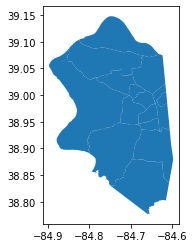

In [7]:
# Plotting the shapefile
boone_tracts.plot()

### 2.3 - Download Census API data

**See Section 1.2 for more information on the Census API.**

The complete list of CensusAPI data is available in the HTML version of the [Census Discovery Tool](https://api.census.gov/data.html)

*See Section 1.2 for more information on the Census API.*

Here's some sample parameters needed to query, *Total Population: Kentucky Census Tracts (2000)*

* Vintage: 2000
* Dataset: dec/sf1
* Variable: P001001
* FIPS: 21 + "*wildcard*"

The titles of these parameters come from the Census Discovery Tool
* The names of the parameters change in the Census API python code.
* For example, "Vintage: 2000" changes to ``year = "2000"`` 

See the [Query Components](https://www.census.gov/data/developers/guidance/api-user-guide.Query_Components.html) guide for more information about these changes. 

And to better understand what parameters are needed for a Census API request.
***
**Wildcards:** You can use wildcards (*) in predicates with string variables and geographies only. 

*For more information on wildcards see pages 5 and 6 of the [Census API User Guide (PDF)](https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf).*

In [8]:
# Build a CensusAPI URL request using the following code
# Request the variable P001001 (Total Population) for all the Census Tracts in Kentucky using sf1 data from the 2000 Decinial Census
# * is a wildcard that represents all available Census Tracts

# The built out request for the URL https://api.census.gov/data/2000/dec/sf1?get=LSAD_NAME,P001001&for=tract:*&in=state:21
HOST = "https://api.census.gov/data"
year = "2000"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])
predicates = {}
get_vars = ["LSAD_NAME", "P001001"]
predicates["get"] = ",".join(get_vars)
predicates["for"] = "tract:*"
predicates["in"] = "state:21"
r = requests.get(base_url, params=predicates)

In [9]:
# Look at the column names
print(r.json()[0])

['LSAD_NAME', 'P001001', 'state', 'county', 'tract']


In [10]:
# Create user friendly column names
tract_name = ["tract_name", "tract_pop", "state_fips", "county_fips", "tract_fips"]
# Reading the json into pandas df
tractdf = pd.DataFrame(columns=tract_name, data=r.json()[1:])
# Changing data types to integer
tractdf["tract_pop"] = tractdf["tract_pop"].astype(int)

tractdf.head()

,tract_name,tract_pop,state_fips,county_fips,tract_fips
0,Census Tract 9703,2892,21,001,9703
1,Census Tract 20,7809,21,067,0020
2,Census Tract 100.06,3678,21,111,010006
3,Census Tract 9501,5528,21,157,9501
4,Census Tract 530,7851,21,037,0530


# 3 - Working Operations to Clean Data

See **Sections 1.3 and 1.4** for more information about Pandas, Geopandas, and Folium.

3.1 - Select by Attributes

3.2 - Column Join

3.3 - Coordinate Reference Systems

3.4 - Field Calculator

### 3.1 - Select by Attributes

In [11]:
# Using .loc to select by attributes for Census Tracts that match Boone County's fips code
# Use .copy() to prevent hidden chaining -> https://www.dataquest.io/blog/settingwithcopywarning/
onecounty_tractdf = tractdf.loc[tractdf['county_fips'] == '015'].copy()
onecounty_tractdf

,tract_name,tract_pop,state_fips,county_fips,tract_fips
626,Census Tract 701,6751,21,015,0701
630,Census Tract 702,6173,21,015,0702
634,Census Tract 703.01,5012,21,015,070301
638,Census Tract 703.04,2769,21,015,070304
642,Census Tract 703.05,5175,21,015,070305
646,Census Tract 703.06,9360,21,015,070306
650,Census Tract 703.07,4521,21,015,070307
654,Census Tract 703.08,4811,21,015,070308
658,Census Tract 703.09,4735,21,015,070309
662,Census Tract 704.01,3464,21,015,070401


In [12]:
# Fill missing zeros from 'tract_fips' column using .str.ljust()
# https://www.tutorialspoint.com/python/string_ljust.htm
onecounty_tractdf['tract_fips'] = onecounty_tractdf['tract_fips'].str.ljust(6,'0')

# Create new 'geoid' column that sums the separated fips codes
onecounty_tractdf['geoid'] = onecounty_tractdf['state_fips'] + onecounty_tractdf['county_fips'] + onecounty_tractdf['tract_fips']

onecounty_tractdf

,tract_name,tract_pop,state_fips,county_fips,tract_fips,geoid
626,Census Tract 701,6751,21,015,070100,21015070100
630,Census Tract 702,6173,21,015,070200,21015070200
634,Census Tract 703.01,5012,21,015,070301,21015070301
638,Census Tract 703.04,2769,21,015,070304,21015070304
642,Census Tract 703.05,5175,21,015,070305,21015070305
646,Census Tract 703.06,9360,21,015,070306,21015070306
650,Census Tract 703.07,4521,21,015,070307,21015070307
654,Census Tract 703.08,4811,21,015,070308,21015070308
658,Census Tract 703.09,4735,21,015,070309,21015070309
662,Census Tract 704.01,3464,21,015,070401,21015070401


In [13]:
# Checking the number of tracts, Boone County has 16
onecounty_tractdf.count()

tract_name     16
tract_pop      16
state_fips     16
county_fips    16
tract_fips     16
geoid          16
dtype: int64

### 3.2 - Column Join

In [14]:
# Explore the data contained in the shapefile
# Look for a column that can join the 'geoid' column of the onecounty_tractdf DataFrame
boone_tracts[['CTIDFP00','NAMELSAD00','ALAND00','AWATER00']]

,CTIDFP00,NAMELSAD00,ALAND00,AWATER00
0,21015070305,Census Tract 703.05,6067476,0
1,21015070604,Census Tract 706.04,82473844,250044
2,21015070601,Census Tract 706.01,92531600,1594231
3,21015070402,Census Tract 704.02,74671314,1347625
4,21015070401,Census Tract 704.01,54308945,8665766
5,21015070307,Census Tract 703.07,20461840,14186
6,21015070306,Census Tract 703.06,10653546,11446
7,21015070603,Census Tract 706.03,54332029,133696
8,21015070301,Census Tract 703.01,11484331,28643
9,21015070100,Census Tract 701,4679032,10301


In [15]:
# Join the shapefile and the CensusAPI dataset together
attr_joined = pd.merge(boone_tracts, onecounty_tractdf, left_on='CTIDFP00', right_on='geoid')
# Check that all 16 Census Tracts joined
attr_joined.count()

STATEFP00      16
COUNTYFP00     16
TRACTCE00      16
CTIDFP00       16
NAME00         16
NAMELSAD00     16
MTFCC00        16
FUNCSTAT00     16
ALAND00        16
AWATER00       16
INTPTLAT00     16
INTPTLON00     16
geometry       16
tract_name     16
tract_pop      16
state_fips     16
county_fips    16
tract_fips     16
geoid          16
dtype: int64

In [16]:
# Explore what the new dataframe looks like
attr_joined[['CTIDFP00','geoid','ALAND00','AWATER00','tract_pop']].head()

,CTIDFP00,geoid,ALAND00,AWATER00,tract_pop
0,21015070305,21015070305,6067476,0,5175
1,21015070604,21015070604,82473844,250044,2558
2,21015070601,21015070601,92531600,1594231,2330
3,21015070402,21015070402,74671314,1347625,6602
4,21015070401,21015070401,54308945,8665766,3464


### 3.3 - Coordinate Reference Systems

See **Sections 1.3 and 1.4** for more information about Coordinate Reference Systems.


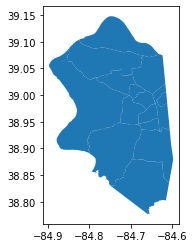

In [17]:
# Plot the new attribute joined shapefile
attr_joined.plot()

In [18]:
# Check the original CRS information
attr_joined.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

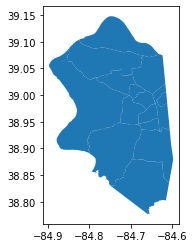

In [19]:
# Changing the CRS to Lat and Long with ESPG=4326
# We use .to_crs() and the EPSG unique ID to convert the CRS
boone_prj = attr_joined.to_crs(epsg=4326)
boone_prj.plot()

### 3.4 - Field Calculator

Preparing the attribute table

In [20]:
# Check to see if the population of the Census Tracts in Boone County adds up
# First change the data type to integer
boone_prj['tract_pop'] = boone_prj['tract_pop'].astype(int)

check = boone_prj.groupby('COUNTYFP00')['tract_pop'].sum()

check.head()

COUNTYFP00
015    85991
Name: tract_pop, dtype: int64

In [21]:
# Create a new column for Census Tract area in square Kilometers

boone_prj['AreaLandKM2'] = (boone_prj['ALAND00'] * .000001)

boone_prj[['geoid','TRACTCE00','ALAND00','AWATER00','AreaLandKM2']].head()

,geoid,TRACTCE00,ALAND00,AWATER00,AreaLandKM2
0,21015070305,070305,6067476,0,6.067476
1,21015070604,070604,82473844,250044,82.473844
2,21015070601,070601,92531600,1594231,92.531600
3,21015070402,070402,74671314,1347625,74.671314
4,21015070401,070401,54308945,8665766,54.308945


In [22]:
# Run a google search of the land are to check that your units are correct

check_km2 = boone_prj.groupby('COUNTYFP00')['AreaLandKM2'].sum()

check_km2.head()

COUNTYFP00
015    638.069235
Name: AreaLandKM2, dtype: float64

In [23]:
# Normalize the population of each tract by the area of each tract in KM2
# This will give us a column that represents the population density of each tract in square kilometers

boone_prj['ppl_perKM2'] = (boone_prj['tract_pop'] / boone_prj['AreaLandKM2'])

boone_prj[['geoid','TRACTCE00','tract_pop','AreaLandKM2','ppl_perKM2']].head(16)

,geoid,TRACTCE00,tract_pop,AreaLandKM2,ppl_perKM2
0,21015070305,070305,5175,6.067476,852.908194
1,21015070604,070604,2558,82.473844,31.015894
2,21015070601,070601,2330,92.531600,25.180587
3,21015070402,070402,6602,74.671314,88.414140
4,21015070401,070401,3464,54.308945,63.783231
5,21015070307,070307,4521,20.461840,220.947872
6,21015070306,070306,9360,10.653546,878.580709
7,21015070603,070603,8170,54.332029,150.371708
8,21015070301,070301,5012,11.484331,436.420720
9,21015070100,070100,6751,4.679032,1442.819797


# 4 - Explore Data using Folium Map

See **Section 1.3** for more information about folium.

Boone County Choropleth: Census Tract Population Density per Square KM.

The folium needs to know where to center the map, to find this information we can use the geopandas function bounds. This function returns four coordinates for each observation in the dataframe. The mean the min and max values provides an approximate location to center the map. For folium to work, the values must be in Longitude (x) and Latitude (y). Latitudes range from -90 to 90. Longitudes range from -180 to 180.

In [36]:
boone_prj.bounds.head()

,minx,miny,maxx,maxy
0,-84.704979,38.990569,-84.664234,39.020976
1,-84.750122,38.777293,-84.608125,38.880245
2,-84.804425,38.830170,-84.675178,38.949100
3,-84.854299,39.028276,-84.671120,39.103514
4,-84.825356,39.070658,-84.635795,39.147732


In [34]:
# What location should the map be centered on?
center_x = (boone_prj.bounds.minx.mean() + boone_prj.bounds.maxx.mean())/2
center_y = (boone_prj.bounds.miny.mean() + boone_prj.bounds.maxy.mean())/2
print(f'The center of the data file is located at {center_x} {center_y}')

The center of the data file is located at -84.68740365625 38.979206156249994


In [35]:
map = fm.Map(location=[center_y, center_x], zoom_start=10)

# Add Study Area Block Groups to Map
fm.Choropleth(
    geo_data = boone_prj,
    data=boone_prj,
    columns=['CTIDFP00','ppl_perKM2'],
    key_on= 'feature.properties.CTIDFP00',
    fill_color='YlGnBu',
    name = 'Population Density',
    legend_name='Population Density'
).add_to(map)
map

# 5 - Save Files

In [28]:
# After running this cell, right click and download the .html file to your local system
# Rename the map as you please, but you must keep the .html extension.
map.save('CensusAPI_PopulationDistributionMap_2020-07-31.html')

In [29]:
# Uncomment to save as .shp or .csv instead
# To mass uncomment highlight and use ctrl+/
# Or delete the hashtag/pound sign (#) from front of the comment
boone_prj.to_file("CensusAPI_PopulationDistributionMap_2020-07-31.shp")

# Save file as CSV - but remove the geometry column which is very large
collist = boone_prj.columns.tolist()
collist.remove('geometry')
boone_prj[collist].to_csv("CensusAPI_PopulationDistributionMap_2020-07-31.csv")